# Detection of Parkinson's Disease using Machine Learning
### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
df = pd.read_csv(r"D:\Downloads\Dataset\parkinsons.csv")

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
df.shape

(195, 24)

In [7]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


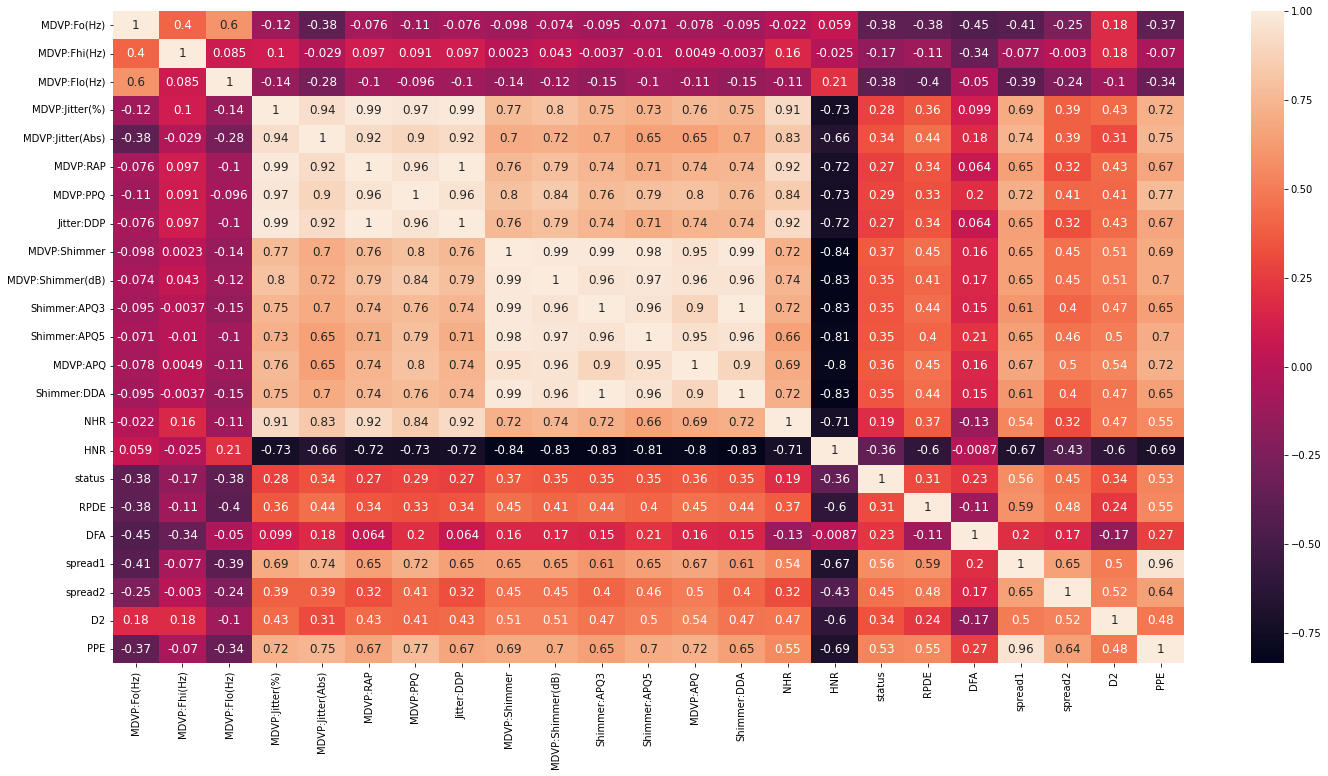

In [10]:
plt.figure(figsize=(24,12))
sns.heatmap(df.corr(), annot = True, annot_kws={'size':12})
plt.show()

### Imbalanced Dataset 

In [11]:
val = df['status'].value_counts()
val

1    147
0     48
Name: status, dtype: int64

<AxesSubplot:xlabel='status', ylabel='count'>

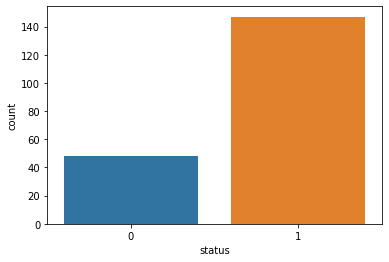

In [12]:
sns.countplot(df['status'])

In [13]:
df.drop(columns = ['name'],axis = 1,inplace = True)

In [14]:
X = df.loc[:,df.columns!="status"]

In [15]:
y = df['status']

### Balancing the dataset

In [16]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
smote_df = pd.concat([X_smote, y_smote], axis=1)
smote_df.shape

(294, 23)

<AxesSubplot:xlabel='status', ylabel='count'>

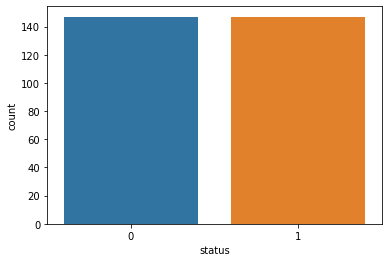

In [17]:
sns.countplot(smote_df['status'])

In [18]:
val = smote_df['status'].value_counts()
val

1    147
0    147
Name: status, dtype: int64

### Separating Training & Test data

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [20]:
X_train.shape

(156, 22)

In [21]:
X_test.shape

(39, 22)

### Splitting the data into Training and Testing samples with balanced data 

In [22]:
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, train_size=0.8, random_state=42)

### Normalization
#### Standard Scaler - Imbalanced Dataset

In [23]:
scaler = StandardScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Scaling balanced data 

In [25]:
X_smote_train_scaled = scaler.fit_transform(X_smote_train)
X_smote_test_scaled = scaler.transform(X_smote_test)

### Function to evaluate the performance of models

In [26]:
def Evaluate_Performance(model, Xtrain, Xtest, Ytrain, Ytest) : 
    model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = model.predict(Xtest)
    print("\n Training Accuracy Score :", round(model.score(Xtrain, Ytrain) * 100,2))
    print(" Cross Validation Score :", round(model_score * 100,2))
    print(" Testing Accuracy Score :",round(accuracy_score(Ytest, Ypredicted) * 100,2))
    print(' Recall Score is :', round(recall_score(Ytest, Ypredicted) * 100,2))
    conf_matrix = confusion_matrix(Ytest,Ypredicted)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, annot_kws={"size": 16})
    plt.title('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

### Logistic Regression - Imbalanced Dataset

Logistic Regression :

 Training Accuracy Score : 87.18
 Cross Validation Score : 83.96
 Testing Accuracy Score : 89.74
 Recall Score is : 100.0


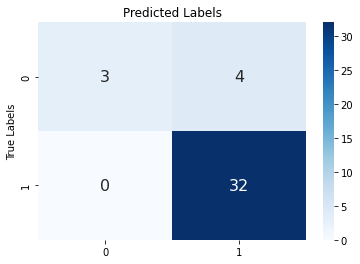

In [27]:
log = LogisticRegression()
print("Logistic Regression :")
Evaluate_Performance(log, X_train_scaled, X_test_scaled, y_train, y_test)

### Logistic Regression - Balanced data

Logistic Regression :

 Training Accuracy Score : 81.7
 Cross Validation Score : 80.04
 Testing Accuracy Score : 88.14
 Recall Score is : 89.66


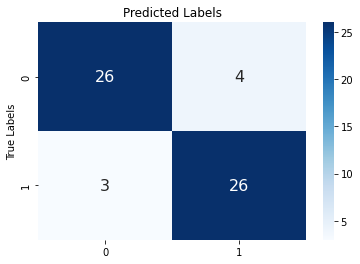

In [28]:
log = LogisticRegression()
print("Logistic Regression :")
Evaluate_Performance(log, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)

### SVM - Imbalanced Dataset 

Support Vector Machine:

 Training Accuracy Score : 90.38
 Cross Validation Score : 87.71
 Testing Accuracy Score : 87.18
 Recall Score is : 93.75


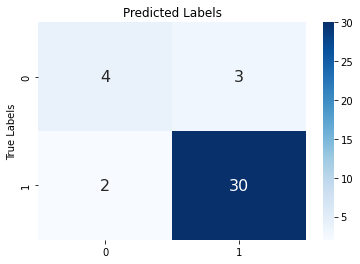

In [29]:
svm = svm.SVC(probability=True, kernel = 'linear')
print("Support Vector Machine:")
Evaluate_Performance(svm, X_train_scaled, X_test_scaled, y_train, y_test)

### SVM - Balanced data

Support Vector Machine:

 Training Accuracy Score : 88.94
 Cross Validation Score : 83.41
 Testing Accuracy Score : 93.22
 Recall Score is : 86.21


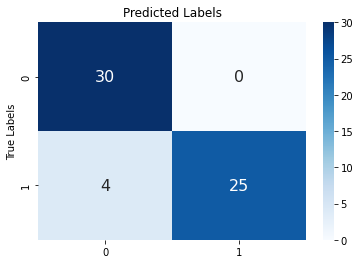

In [30]:
print("Support Vector Machine:")
Evaluate_Performance(svm, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)

### Decision Tree - Imbalanced Dataset

Decision Tree Classifier :

 Training Accuracy Score : 100.0
 Cross Validation Score : 86.58
 Testing Accuracy Score : 89.74
 Recall Score is : 93.75


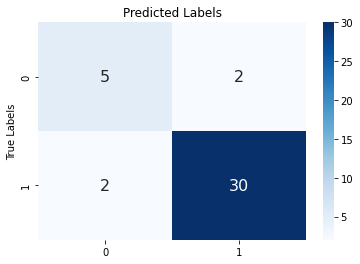

In [31]:
dtc=DecisionTreeClassifier()
print('Decision Tree Classifier :')
Evaluate_Performance(dtc, X_train_scaled, X_test_scaled, y_train, y_test)

### Decision Tree - Balanced data

Decision Tree Classifier:

 Training Accuracy Score : 100.0
 Cross Validation Score : 89.33
 Testing Accuracy Score : 98.31
 Recall Score is : 100.0


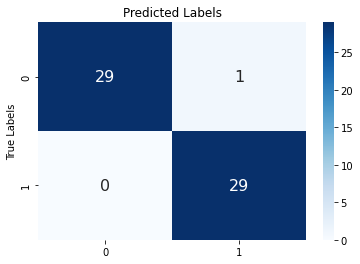

In [32]:
dtc=DecisionTreeClassifier()
print("Decision Tree Classifier:")
Evaluate_Performance(dtc, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)

### Hyperparameter tuning


 Training Accuracy Score : 97.02
 Cross Validation Score : 89.78
 Testing Accuracy Score : 94.92
 Recall Score is : 96.55


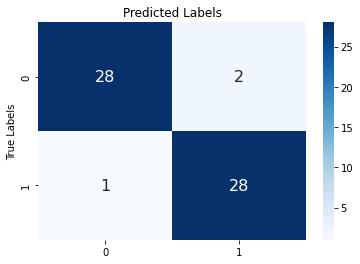

Best parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 4}
Best score: 0.9106382978723404


In [33]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}
dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
Evaluate_Performance(grid_search, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

### Random Forest Classifier - Imbalanced Dataset

Random Forest Classifier:

 Training Accuracy Score : 100.0
 Cross Validation Score : 89.62
 Testing Accuracy Score : 94.87
 Recall Score is : 100.0


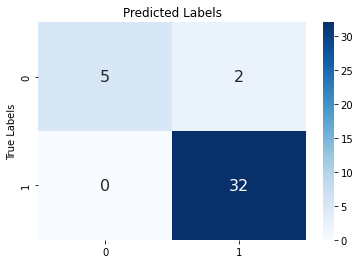

In [34]:
rfc=RandomForestClassifier(n_estimators=150)
print('Random Forest Classifier:')
Evaluate_Performance(rfc, X_train_scaled, X_test_scaled, y_train, y_test)

### Random Forest Classifier - Balanced data

Random Forest Classifier:

 Training Accuracy Score : 100.0
 Cross Validation Score : 93.17
 Testing Accuracy Score : 100.0
 Recall Score is : 100.0


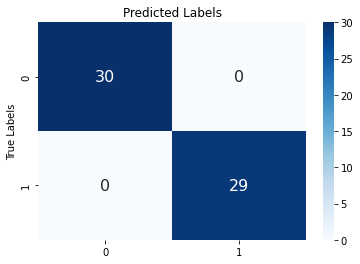

In [35]:
print("Random Forest Classifier:")
Evaluate_Performance(rfc , X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)

### KNN - Imbalanced Dataset

K-Nearest Neighbor :

 Training Accuracy Score : 94.87
 Cross Validation Score : 88.46
 Testing Accuracy Score : 94.87
 Recall Score is : 100.0


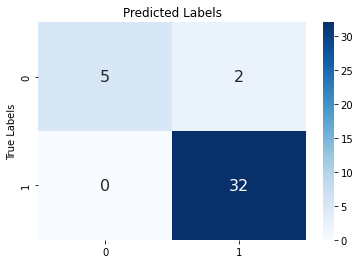

In [36]:
knn = KNeighborsClassifier()
print("K-Nearest Neighbor :")
Evaluate_Performance(knn, X_train_scaled, X_test_scaled, y_train, y_test)

### ⭐ KNN - Balanced data

K-Nearest Neighbor :

 Training Accuracy Score : 94.04
 Cross Validation Score : 91.09
 Testing Accuracy Score : 96.61
 Recall Score is : 96.55


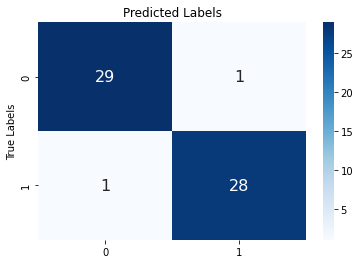

In [37]:
print("K-Nearest Neighbor :")
Evaluate_Performance(knn , X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)

### Hyperparameter tuning 


 Training Accuracy Score : 97.45
 Cross Validation Score : 91.11
 Testing Accuracy Score : 100.0
 Recall Score is : 100.0


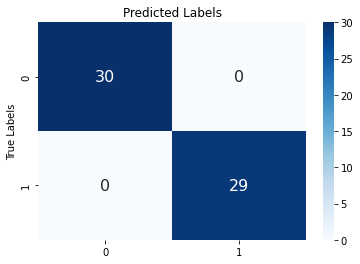

Best parameters: {'n_neighbors': 3}
Best score: 0.9148936170212766


In [38]:
parameter = {
    'n_neighbors': [3, 5, 7, 9],
}

grid_search = GridSearchCV(knn, parameter, scoring='accuracy', cv=5)
Evaluate_Performance(grid_search, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

### XGBoost - Imbalanced Dataset

XGBoost Classifier :

 Training Accuracy Score : 100.0
 Cross Validation Score : 89.67
 Testing Accuracy Score : 94.87
 Recall Score is : 100.0


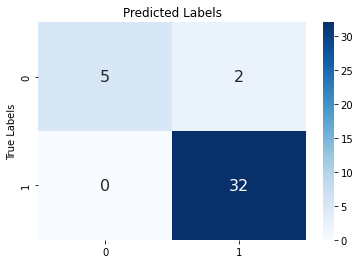

In [39]:
xgb = XGBClassifier(eval_metric='mlogloss')
print("XGBoost Classifier :")
Evaluate_Performance(xgb, X_train_scaled, X_test_scaled, y_train, y_test)

### XGBoost - Balanced data

XGBoost Classifier :

 Training Accuracy Score : 100.0
 Cross Validation Score : 91.5
 Testing Accuracy Score : 100.0
 Recall Score is : 100.0


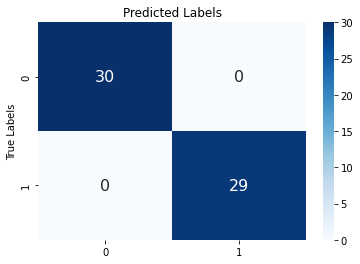

In [40]:
print("XGBoost Classifier :")
Evaluate_Performance(xgb, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)

# KNN - Balanced data has best accuracy/Decision tree classifier has also good accuracy

In [41]:
input_data = (236.20000,244.66300,102.13700,0.00277,0.00001,0.00154,0.00153,0.00462,
              0.02448,0.21700,0.01410,0.01426,0.01621,0.04231,0.00620,24.07800,0.469928,
              0.628232,-6.816086,0.172270,2.235197,0.119652)
input_data_arr = np.asarray(input_data)
input_data_res = input_data_arr.reshape(1 , -1)
data = scaler.transform(input_data_res)
pred = knn.predict(data)               # Using Knn - Balanced data model to check
print(pred)

if(pred[0]==0):
    print("Negative, No Parkinson's Found. You are healthy.")
else:
    print("Positive, Parkinson's Found. Contact Doctor.")

[0]
Negative, No Parkinson's Found. You are healthy.
